<a href="https://colab.research.google.com/github/TatsianaPoto/pro_test/blob/main/task1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1**

Разработка нейронной сети Разработайте простую нейронную сеть на Python с использованием TensorFlow или любого другого предпочитаемого вами фреймворка машинного обучения. Сеть должна быть способна классифицировать изображения из набора данных MNIST. Обучите вашу модель и оцените ее производительность.
Предоставьте отчет, включающий в себя метрики точности и потерь. Опишите, как вы настроили и обучили вашу модель, и объясните, какие параметры вы выбрали и почему.

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.metrics import Recall, Precision
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [25]:
# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Нормализация изображений
train_images, test_images = train_images / 255.0, test_images / 255.0

# Преобразование меток в формат one-hot
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

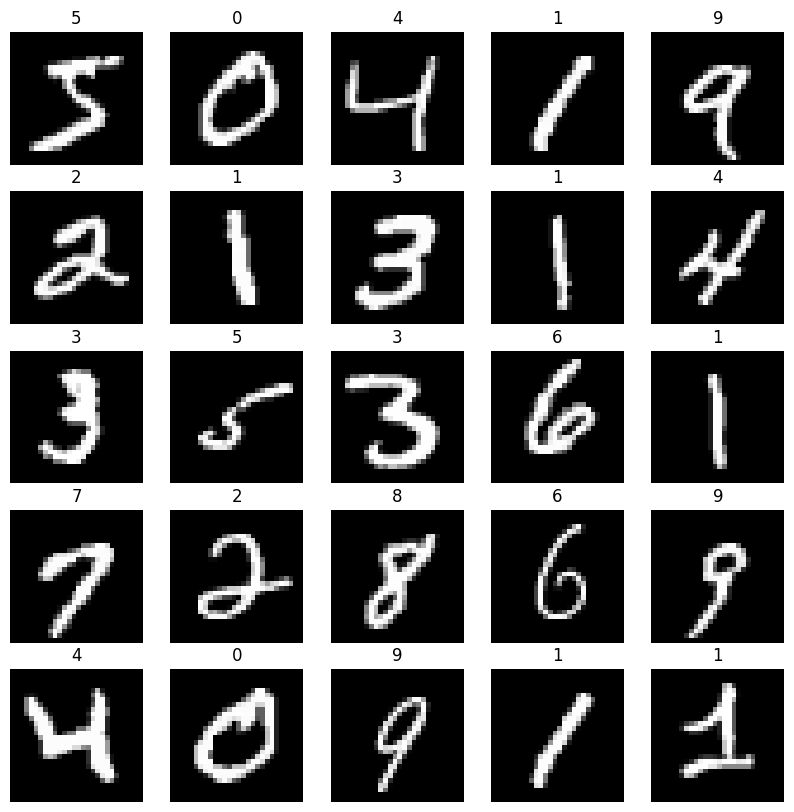

In [26]:
# Отобразим несколько примеров изображений из обучающего набора данных
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(str(train_labels[i].argmax()))
    plt.axis('off')
plt.show()

In [27]:
# Создадим простую нейронную сеть
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Преобразование изображения в вектор
    Dense(128, activation='relu'),    # Полносвязный слой с 128 нейронами и функцией активации ReLU
    Dense(10, activation='softmax')   # Выходной слой с 10 нейронами (по числу классов) и функцией активации Softmax
])

# Компилируем модель, выбрав функцию потерь, оптимизатор и метрики
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Recall(name='recall'), Precision(name='precision')])

# Обучим модель на тренировочных данных
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2812 - accuracy: 0.9199 - recall: 0.8868 - precision: 0.9500 - val_loss: 0.1556 - val_accuracy: 0.9548 - val_recall: 0.9452 - val_precision: 0.9641
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1243 - accuracy: 0.9640 - recall: 0.9567 - precision: 0.9708 - val_loss: 0.1117 - val_accuracy: 0.9672 - val_recall: 0.9628 - val_precision: 0.9737
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0871 - accuracy: 0.9741 - recall: 0.9701 - precision: 0.9790 - val_loss: 0.1004 - val_accuracy: 0.9706 - val_recall: 0.9685 - val_precision: 0.9737
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0666 - accuracy: 0.9800 - recall: 0.9769 - precision: 0.9830 - val_loss: 0.0930 - val_accuracy: 0.9726 - val_recall: 0.9687 - val_precision: 0.9762
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0514 - accuracy: 0

In [28]:
# Оценим производительность модели на тестовых данных
test_loss, test_accuracy, test_recall, test_precision = model.evaluate(test_images, test_labels)
print("Точность на тестовых данных:", test_accuracy)
print("Потери на тестовых данных:", test_loss)
print("Recall на тестовых данных:", test_recall)
print("Precision на тестовых данных:", test_precision)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9781 - recall: 0.9765 - precision: 0.9800
Точность на тестовых данных: 0.9781000018119812
Потери на тестовых данных: 0.08052651584148407
Recall на тестовых данных: 0.9764999747276306
Precision на тестовых данных: 0.9800280928611755


In [29]:
# Получим предсказания модели на тестовых данных
test_predictions = model.predict(test_images)

# Преобразуем предсказания в метки классов
test_predictions_labels = [tf.argmax(prediction) for prediction in test_predictions]

# Преобразуем one-hot кодирование меток в обычный формат
test_true_labels = [tf.argmax(label) for label in test_labels]

313/313 [==============================] - 1s 2ms/step


In [30]:
# Вычислим F1-score на тестовых данных
f1 = f1_score(test_true_labels, test_predictions_labels, average='macro')
print("F1-score на тестовых данных:", f1)

F1-score на тестовых данных: 0.9779064473879266


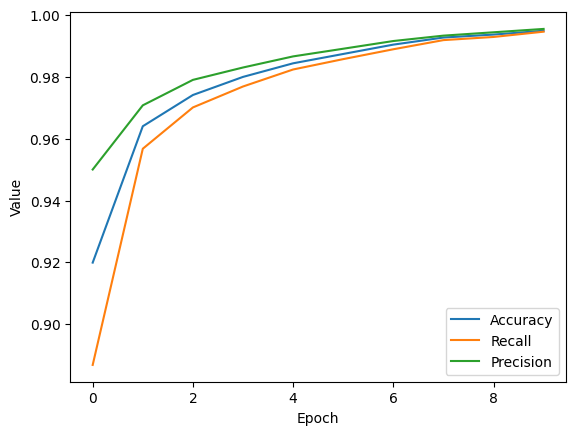

In [31]:
# Построим графики метрик accuracy, recall и precision
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['recall'], label='Recall')
plt.plot(history.history['precision'], label='Precision')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

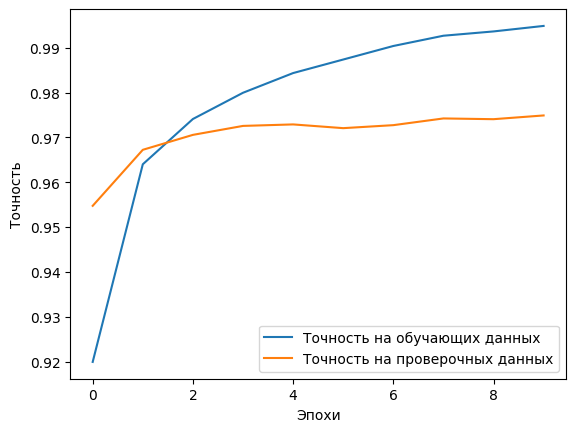

In [32]:
# Визуализация точности на обучающих и проверочных данных
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на проверочных данных')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

Для решения этой задачи я использовала colab

Для создания и обучения модели классификации изображений MNIST была использована простая нейронная сеть с одним скрытым слоем.

**Архитектура модели:**

Входной слой: Flatten слой для преобразования 28x28 пиксельных изображений в вектор размерности 784.
Скрытый слой: Dense слой с 128 нейронами и функцией активации ReLU. Этот слой позволяет модели извлекать признаки из данных и обучаться на более сложных зависимостях.
Выходной слой: Dense слой с 10 нейронами и функцией активации Softmax, который выдает вероятности принадлежности каждого из 10 классов цифр (от 0 до 9).

**Функция потерь и оптимизатор:**

В качестве функции потерь была выбрана категориальная перекрестная энтропия (categorical_crossentropy), которая подходит для многоклассовой классификации с one-hot кодированием меток.
Оптимизатором был использован Adam, популярный алгоритм оптимизации с адаптивным скользящим средним градиента. Adam хорошо подходит для различных задач обучения нейронных сетей и обычно обеспечивает быструю сходимость.

**Выбор числа эпох и размера пакета:**

Эпохи (epochs): Количество эпох установлено равным 10. Определение числа эпох зависит от размера и сложности данных, вычислительных ресурсов и проблемы, которую вы хотите решить. В данном случае, учитывая небольшой размер данных MNIST и простоту модели, 10 эпох должно быть достаточно для достижения приемлемой точности.

**Размер пакета (batch_size):**

Установлено равным 32. Выбор размера пакета зависит от доступной памяти на GPU или CPU. Маленький размер пакета позволяет уменьшить потребление памяти, но может замедлить обучение из-за частых обновлений весов. В данном случае, значение 32 является стандартным и хорошо подходит для большинства моделей.

**Метрики:**

Во время обучения добавлены дополнительные метрики: accuracy, recall и precision.
Accuracy (Точность) - общая точность модели в определении классов.
Recall (Полнота) - способность модели правильно выявлять все положительные классы.
Precision (Точность) - способность модели избегать ложных срабатываний.
F1-score - среднее гармоническое между precision и recall. Характеризует сбалансированность между точностью и полнотой.

**Графики:**

Построены графики метрик accuracy, recall и precision по эпохам обучения, чтобы наблюдать их изменение в процессе обучения.
F1-score рассчитан после завершения обучения модели на тестовых данных.

Общий подход был направлен на создание простой и эффективной модели, способной классифицировать цифры с высокой точностью, используя минимальное количество эпох для обучения.